In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("Reviews.csv")
df = df[['Score', 'Text']]
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [3]:
def convert_sentiment(score):
    if score >= 4:
        return "positive"
    elif score == 3:
        return "neutral"
    else:
        return "negative"

df['sentiment'] = df['Score'].apply(convert_sentiment)
df.head()

,Score,Text,sentiment
0,5,I have bought several of the Vitality canned d...,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,negative
2,4,This is a confection that has been around a fe...,positive
3,2,If you are looking for the secret ingredient i...,negative
4,5,Great taffy at a great price. There was a wid...,positive


In [4]:
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

In [5]:
df['clean_text'] = df['Text'].apply(clean_text)
df.head()

,Score,Text,sentiment,clean_text
0,5,I have bought several of the Vitality canned d...,positive,bought sever vital can dog food product found ...
1,1,Product arrived labeled as Jumbo Salted Peanut...,negative,product arriv label jumbo salt peanutsth peanu...
2,4,This is a confection that has been around a fe...,positive,confect around centuri light pillowi citru gel...
3,2,If you are looking for the secret ingredient i...,negative,look secret ingredi robitussin believ found go...
4,5,Great taffy at a great price. There was a wid...,positive,great taffi great price wide assort yummi taff...


In [6]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [19]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8646154928710276

Classification Report:

              precision    recall  f1-score   support

    negative       0.73      0.66      0.69     16181
     neutral       0.51      0.17      0.26      8485
    positive       0.90      0.97      0.93     89025

    accuracy                           0.86    113691
   macro avg       0.71      0.60      0.63    113691
weighted avg       0.84      0.86      0.85    113691



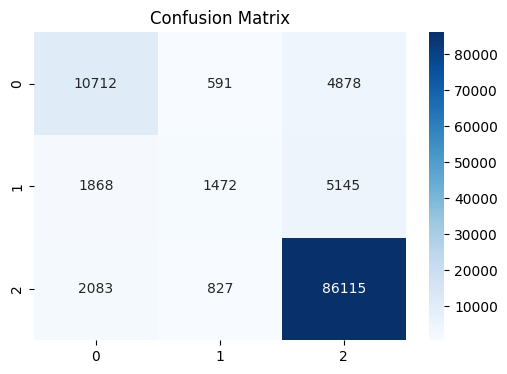

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [17]:
joblib.dump(model, "project05_sentiment_model.joblib")
joblib.dump(tfidf, "project05_tfidf.joblib")

['project05_tfidf.joblib']

In [16]:
df['predicted'] = model.predict(tfidf.transform(df['clean_text']))
df.to_csv("Project_05_Final_Output.csv", index=False)

df.head()

,Score,Text,sentiment,clean_text,predicted
0,5,I have bought several of the Vitality canned d...,positive,bought sever vital can dog food product found ...,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,negative,product arriv label jumbo salt peanutsth peanu...,negative
2,4,This is a confection that has been around a fe...,positive,confect around centuri light pillowi citru gel...,positive
3,2,If you are looking for the secret ingredient i...,negative,look secret ingredi robitussin believ found go...,positive
4,5,Great taffy at a great price. There was a wid...,positive,great taffi great price wide assort yummi taff...,positive
